<a href="https://colab.research.google.com/github/SongHM-cloud/project/blob/main/job_scheduling_simulated_annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best Schedule: ['J41', 'J12', 'J23', 'J1', 'J50', 'J77', 'J69', 'J9', 'J40', 'J42', 'J6', 'J38', 'J48', 'J91', 'J66', 'J56', 'J97', 'J85', 'J45', 'J35', 'J64', 'J22', 'J43', 'J100', 'J88', 'J74', 'J60', 'J72', 'J37', 'J95', 'J71', 'J36', 'J81', 'J8', 'J33', 'J80', 'J63', 'J26', 'J16', 'J29', 'J70', 'J75', 'J61', 'J62', 'J24', 'J28', 'J4', 'J21', 'J52', 'J49', 'J39', 'J20', 'J19', 'J65', 'J58', 'J99', 'J76', 'J90', 'J57', 'J54', 'J10', 'J46', 'J3', 'J92', 'J79', 'J11', 'J18', 'J32', 'J78', 'J51', 'J17', 'J59', 'J83', 'J25', 'J55', 'J67', 'J82', 'J94', 'J7', 'J31', 'J27', 'J53', 'J34', 'J68', 'J93', 'J15', 'J84', 'J2', 'J86', 'J30', 'J47', 'J98', 'J5', 'J13', 'J73', 'J96', 'J89', 'J87', 'J14', 'J44']
Total Time Taken: 3389 minutes


<ipython-input-2-15e17ec45eee>:166: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('nipy_spectral', len(jobs))


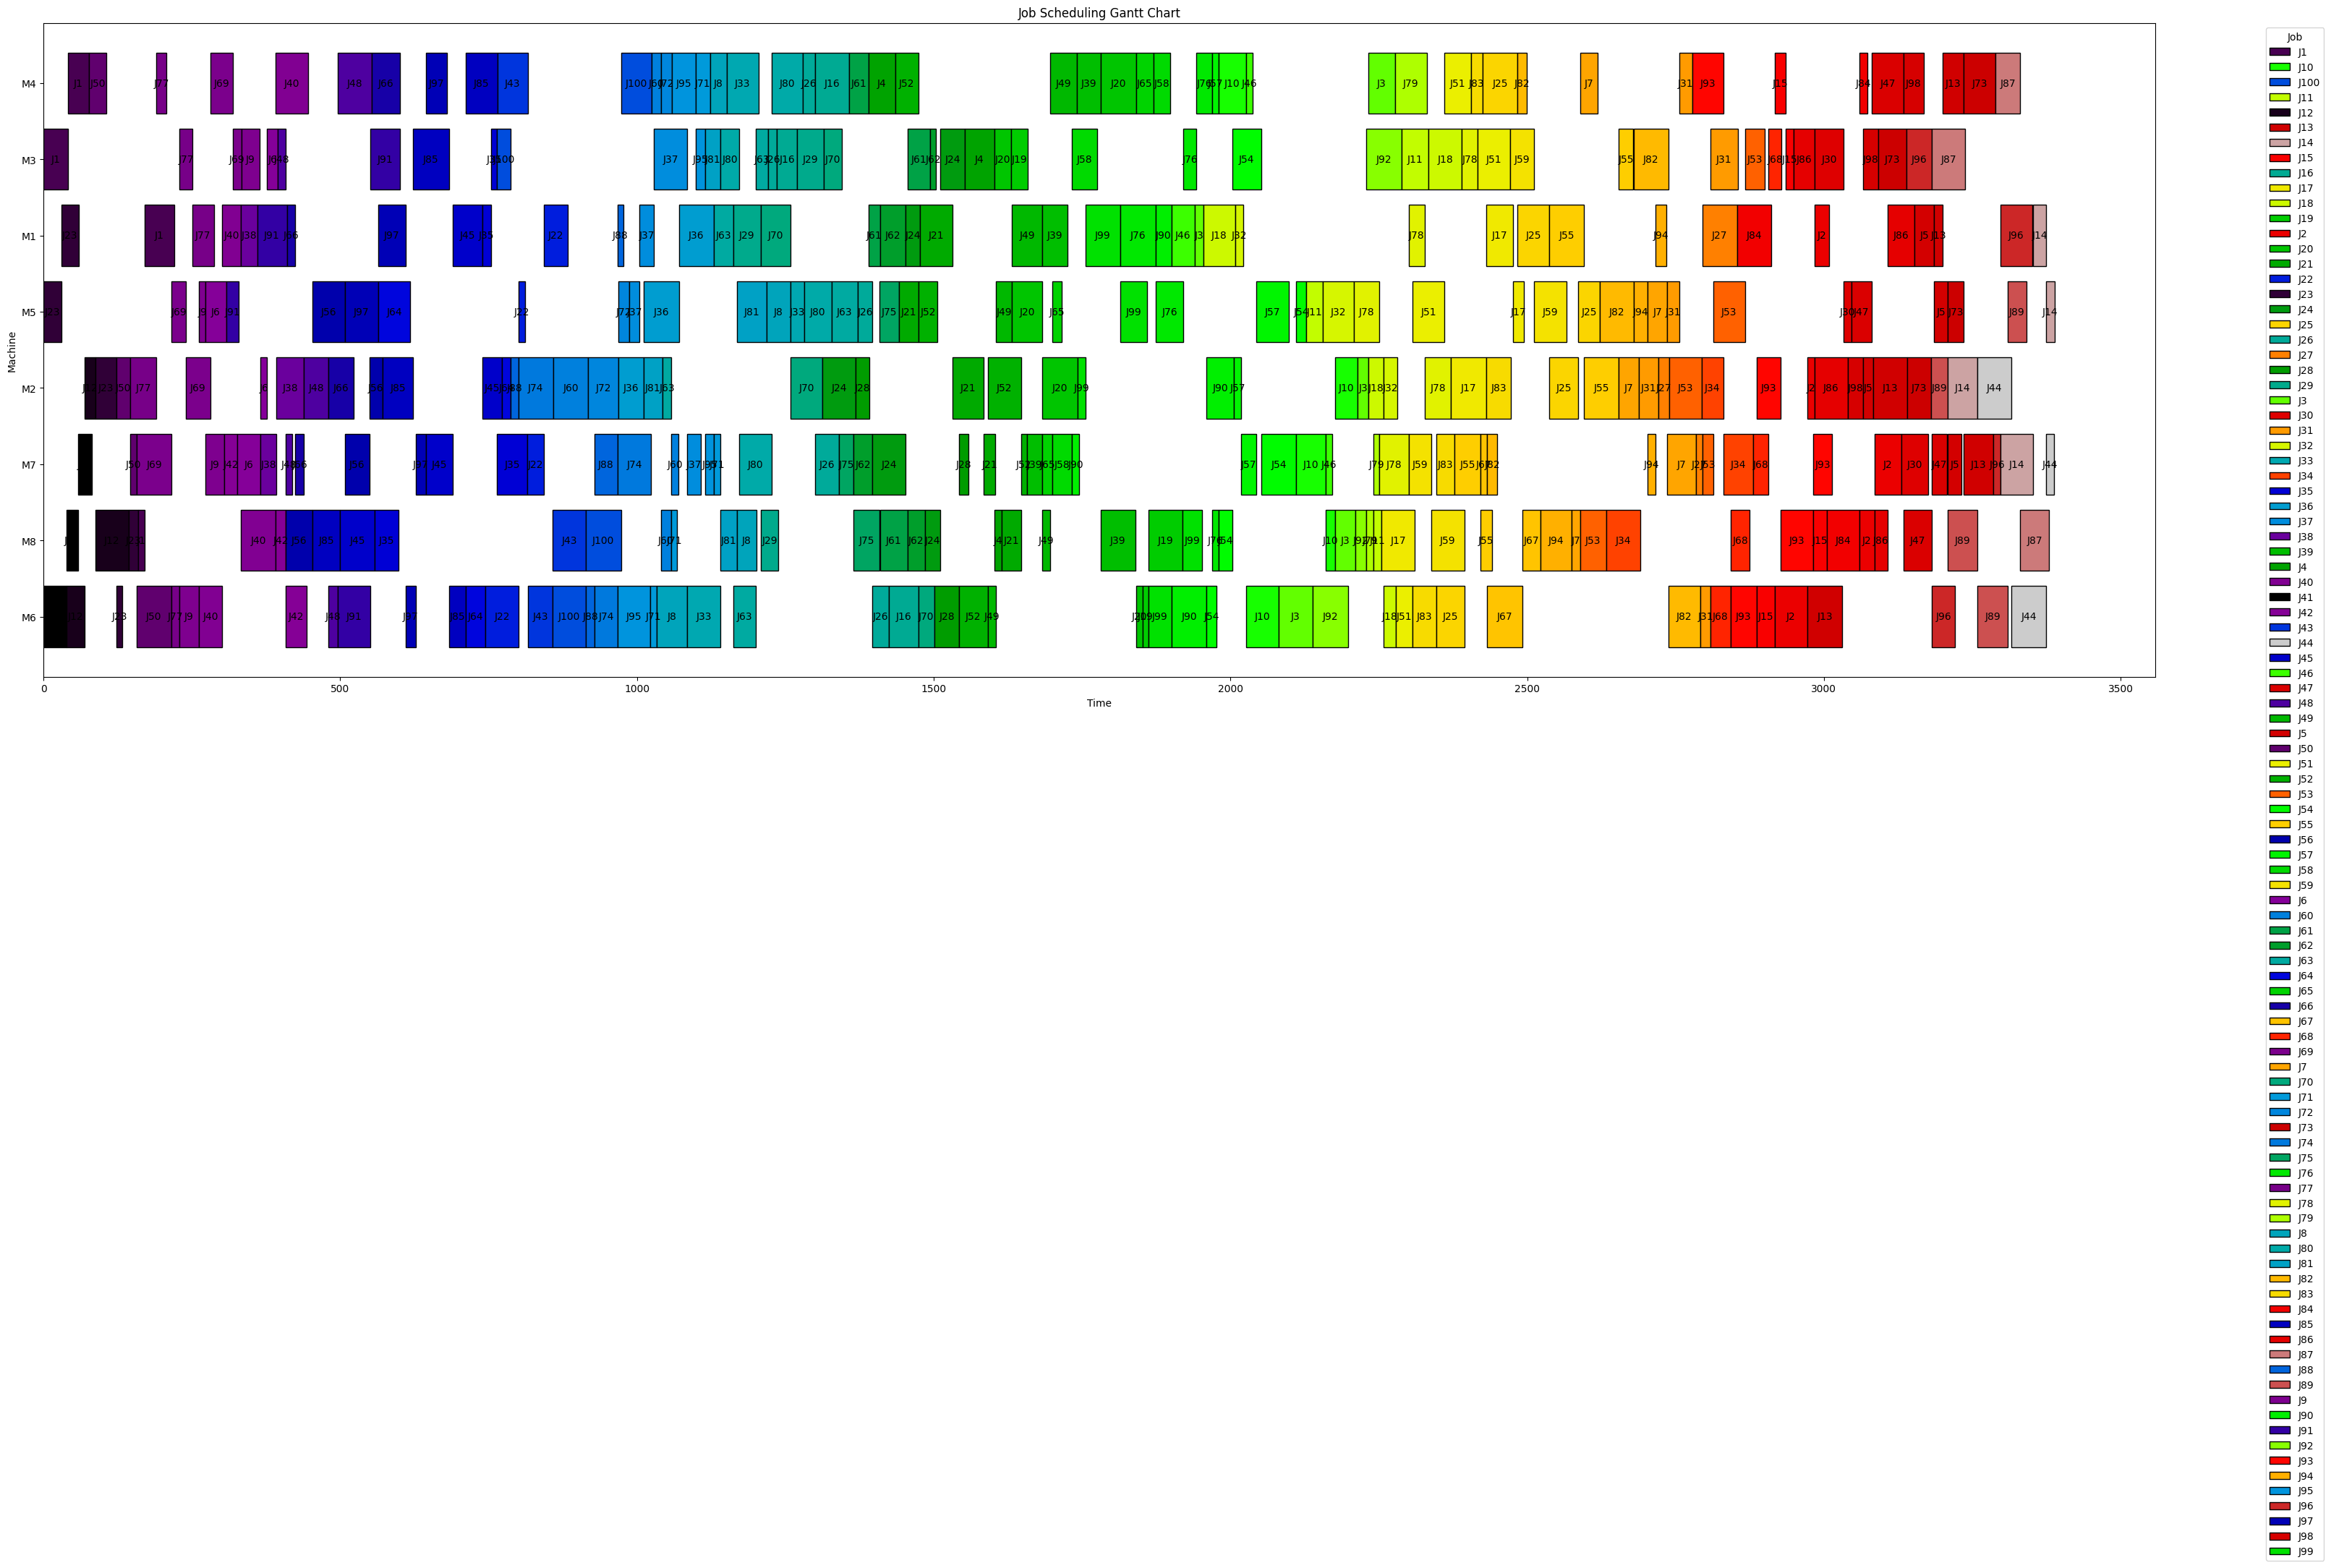

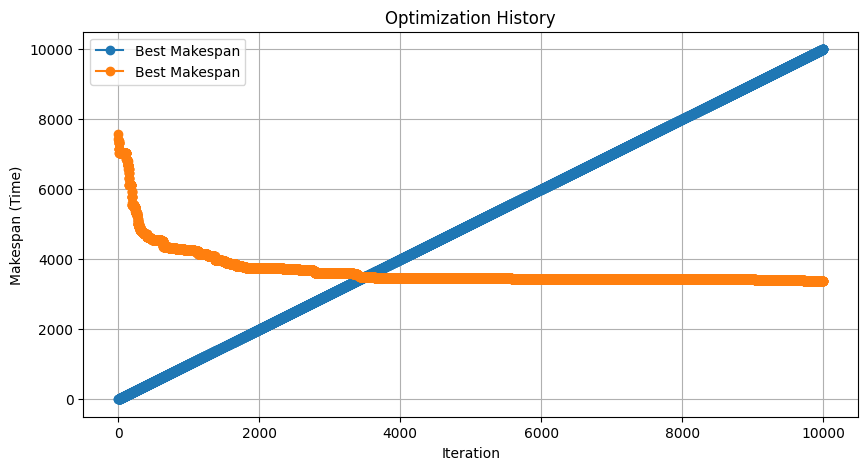

In [ ]:
import random
import math
import matplotlib.pyplot as plt
# 작업 스케줄 데이터
jobs_data = {
    'J1': [('M3', 41), ('M4', 36), ('M8', 11), ('M1', 50)],
'J2': [('M6', 55), ('M2', 13), ('M1', 24), ('M8', 25), ('M7', 46)],
'J3': [('M1', 15), ('M6', 58), ('M8', 34), ('M2', 19), ('M4', 44)],
'J4': [('M4', 45), ('M3', 49), ('M8', 13)],
'J5': [('M2', 17), ('M1', 33), ('M5', 23), ('M7', 23)],
'J6': [('M5', 35), ('M7', 39), ('M2', 11), ('M3', 18)],
'J7': [('M8', 14), ('M4', 30), ('M2', 34), ('M5', 33), ('M7', 48)],
'J8': [('M6', 52), ('M4', 28), ('M8', 32), ('M5', 41)],
'J9': [('M6', 33), ('M5', 11), ('M7', 31), ('M3', 30)],
'J10': [('M4', 46), ('M6', 55), ('M7', 50), ('M8', 15), ('M2', 38)],
'J11': [('M5', 28), ('M8', 14), ('M3', 45)],
'J12': [('M6', 30), ('M2', 18), ('M8', 57)],
'J13': [('M6', 59), ('M2', 58), ('M1', 14), ('M4', 35), ('M7', 51)],
'J14': [('M2', 50), ('M7', 55), ('M1', 21), ('M5', 15)],
'J15': [('M6', 30), ('M4', 19), ('M3', 13), ('M8', 23)],
'J16': [('M3', 34), ('M4', 58), ('M6', 49)],
'J17': [('M8', 56), ('M2', 59), ('M1', 45), ('M5', 19)],
'J18': [('M1', 53), ('M2', 25), ('M6', 21), ('M3', 56)],
'J19': [('M3', 28), ('M6', 10), ('M8', 57)],
'J20': [('M3', 28), ('M5', 51), ('M2', 60), ('M4', 60), ('M6', 11)],
'J21': [('M5', 33), ('M1', 55), ('M2', 52), ('M7', 20), ('M8', 32)],
'J22': [('M6', 55), ('M5', 11), ('M7', 28), ('M1', 40)],
'J23': [('M5', 30), ('M1', 29), ('M2', 36), ('M6', 10), ('M8', 15)],
'J24': [('M2', 57), ('M7', 56), ('M1', 24), ('M8', 26), ('M3', 42)],
'J25': [('M6', 48), ('M4', 59), ('M1', 53), ('M2', 49), ('M5', 37)],
'J26': [('M3', 15), ('M4', 21), ('M7', 41), ('M5', 25), ('M6', 28)],
'J27': [('M2', 19), ('M7', 11), ('M1', 59)],
'J28': [('M2', 23), ('M6', 42), ('M7', 15)],
'J29': [('M1', 47), ('M8', 29), ('M3', 45)],
'J30': [('M3', 48), ('M5', 13), ('M7', 45)],
'J31': [('M2', 33), ('M5', 20), ('M4', 22), ('M6', 17), ('M3', 46)],
'J32': [('M1', 14), ('M5', 52), ('M2', 23)],
'J33': [('M6', 56), ('M4', 54), ('M5', 23)],
'J34': [('M8', 58), ('M2', 37), ('M7', 50)],
'J35': [('M8', 40), ('M1', 15), ('M3', 10), ('M7', 51)],
'J36': [('M2', 42), ('M5', 60), ('M1', 58)],
'J37': [('M5', 17), ('M1', 25), ('M3', 56), ('M7', 23)],
'J38': [('M1', 27), ('M7', 26), ('M2', 47)],
'J39': [('M7', 26), ('M1', 43), ('M4', 40), ('M8', 59)],
'J40': [('M6', 39), ('M1', 32), ('M8', 58), ('M4', 55)],
'J41': [('M6', 39), ('M8', 19), ('M7', 24)],
'J42': [('M7', 23), ('M8', 17), ('M6', 35)],
'J43': [('M4', 51), ('M6', 42), ('M8', 56)],
'J44': [('M2', 57), ('M6', 59), ('M7', 13)],
'J45': [('M8', 58), ('M7', 46), ('M1', 49), ('M2', 34)],
'J46': [('M1', 39), ('M4', 11), ('M7', 10)],
'J47': [('M5', 35), ('M4', 53), ('M8', 48), ('M7', 25)],
'J48': [('M3', 13), ('M7', 11), ('M2', 41), ('M6', 16), ('M4', 57)],
'J49': [('M6', 14), ('M5', 27), ('M1', 51), ('M8', 13), ('M4', 45)],
'J50': [('M4', 29), ('M2', 23), ('M7', 11), ('M6', 58)],
'J51': [('M6', 28), ('M5', 54), ('M4', 44), ('M3', 54)],
'J52': [('M4', 39), ('M5', 31), ('M6', 48), ('M2', 56), ('M7', 10)],
'J53': [('M8', 44), ('M2', 54), ('M7', 19), ('M5', 53), ('M3', 33)],
'J54': [('M6', 17), ('M8', 23), ('M3', 49), ('M7', 59), ('M5', 17)],
'J55': [('M7', 43), ('M8', 20), ('M1', 59), ('M2', 58), ('M3', 25)],
'J56': [('M8', 45), ('M5', 55), ('M7', 41), ('M2', 22)],
'J57': [('M4', 11), ('M2', 12), ('M7', 26), ('M5', 54)],
'J58': [('M7', 33), ('M3', 43), ('M4', 29)],
'J59': [('M7', 37), ('M8', 57), ('M3', 40), ('M5', 55)],
'J60': [('M2', 59), ('M4', 15), ('M8', 18), ('M7', 12)],
'J61': [('M4', 32), ('M1', 20), ('M8', 46), ('M3', 38)],
'J62': [('M7', 32), ('M1', 42), ('M8', 29), ('M3', 10)],
'J63': [('M2', 15), ('M1', 33), ('M6', 38), ('M3', 21), ('M5', 44)],
'J64': [('M5', 54), ('M6', 34), ('M2', 14)],
'J65': [('M7', 17), ('M5', 16), ('M4', 29)],
'J66': [('M1', 14), ('M7', 15), ('M2', 43), ('M4', 48)],
'J67': [('M7', 11), ('M6', 60), ('M8', 31)],
'J68': [('M6', 34), ('M8', 32), ('M7', 26), ('M3', 21)],
'J69': [('M7', 59), ('M5', 24), ('M2', 41), ('M4', 38), ('M3', 15)],
'J70': [('M1', 50), ('M2', 53), ('M3', 30), ('M6', 27)],
'J71': [('M6', 11), ('M8', 10), ('M4', 24), ('M7', 10)],
'J72': [('M2', 51), ('M5', 18), ('M4', 19)],
'J73': [('M3', 47), ('M2', 40), ('M5', 27), ('M4', 53)],
'J74': [('M2', 59), ('M6', 38), ('M7', 57)],
'J75': [('M7', 24), ('M8', 44), ('M5', 33)],
'J76': [('M1', 60), ('M5', 47), ('M3', 22), ('M4', 26), ('M8', 11)],
'J77': [('M2', 44), ('M4', 17), ('M6', 14), ('M3', 22), ('M1', 36)],
'J78': [('M5', 43), ('M7', 50), ('M1', 26), ('M2', 45), ('M3', 27)],
'J79': [('M8', 12), ('M7', 10), ('M4', 54)],
'J80': [('M3', 31), ('M7', 55), ('M4', 52), ('M5', 46)],
'J81': [('M2', 32), ('M3', 26), ('M8', 28), ('M5', 49)],
'J82': [('M7', 18), ('M4', 15), ('M5', 57), ('M3', 58), ('M6', 54)],
'J83': [('M6', 40), ('M7', 31), ('M4', 20), ('M2', 42)],
'J84': [('M1', 57), ('M8', 55), ('M4', 14)],
'J85': [('M8', 47), ('M2', 52), ('M3', 60), ('M6', 28), ('M4', 54)],
'J86': [('M3', 36), ('M2', 55), ('M8', 23), ('M1', 45)],
'J87': [('M3', 56), ('M4', 42), ('M8', 48)],
'J88': [('M2', 13), ('M6', 15), ('M7', 38), ('M1', 10)],
'J89': [('M2', 28), ('M8', 50), ('M6', 51), ('M5', 31)],
'J90': [('M7', 12), ('M1', 27), ('M6', 59), ('M2', 46)],
'J91': [('M5', 21), ('M1', 50), ('M6', 55), ('M3', 50)],
'J92': [('M6', 59), ('M8', 19), ('M3', 60)],
'J93': [('M4', 53), ('M6', 44), ('M2', 40), ('M8', 55), ('M7', 32)],
'J94': [('M8', 52), ('M5', 23), ('M7', 13), ('M1', 18)],
'J95': [('M6', 55), ('M4', 40), ('M3', 16), ('M7', 15)],
'J96': [('M3', 43), ('M6', 39), ('M7', 12), ('M1', 53)],
'J97': [('M5', 56), ('M1', 46), ('M6', 17), ('M7', 17), ('M4', 36)],
'J98': [('M2', 26), ('M3', 26), ('M4', 34)],
'J99': [('M2', 13), ('M1', 58), ('M5', 46), ('M6', 39), ('M8', 33)],
'J100': [('M3', 23), ('M6', 56), ('M8', 59), ('M4', 52)]
}

# 작업 스케줄 생성
def create_balanced_initial_schedule():
    machine_jobs = {f'M{i}': [] for i in range(1, 9)}  # 각 머신에 할당된 작업 리스트
    for job, tasks in jobs_data.items():
        for machine, _ in tasks:
            machine_jobs[machine].append(job)

    # 각 머신에서 작업을 번갈아가며 선택하도록 하여 초기 작업 순서 생성
    schedule = []
    while any(machine_jobs.values()):  # 모든 머신에 할당된 작업이 소진될 때까지
        for machine in machine_jobs:
            if machine_jobs[machine]:  # 해당 머신에 아직 할당된 작업이 남아있다면
                job = machine_jobs[machine].pop(0)  # 가장 앞의 작업을 선택
                if job not in schedule:  # 작업이 아직 스케줄에 추가되지 않았다면
                    schedule.append(job)

    return schedule


def calculate_total_time(schedule):
    machine_times = {f'M{i}': 0 for i in range(1, 9)}  # M1 to M8
    job_end_times = {job: 0 for job in schedule}  # 각 작업의 종료 시간 추적

    job_start_times = {}  # 각 작업의 시작 시간을 기록

    for job in schedule:
        job_start_times[job] = []
        current_time = 0

        for machine, duration in jobs_data[job]:
            # 각 작업이 이전 머신 작업이 끝난 시점과 해당 머신의 가용 시점 중 더 늦게 시작할 수 있음
            start_time = max(machine_times[machine], job_end_times[job])

            # 해당 작업이 이 머신에서 시작하고 끝나는 시간 기록
            job_start_times[job].append((machine, start_time, start_time + duration))

            # 머신의 마지막 종료 시간 업데이트
            machine_times[machine] = start_time + duration

            # 해당 작업의 종료 시간을 갱신 (다음 머신 작업에서 시작할 때 필요)
            job_end_times[job] = start_time + duration

    makespan = max(machine_times.values())  # 모든 작업이 끝나는 최종 시간
    return makespan, job_start_times


# 인접 스케줄 생성 (swap)
def create_neighbor(schedule):
    neighbor = schedule[:]
    i, j = random.sample(range(len(schedule)), 2)
    neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
    return neighbor

# Gantt 차트 그리기
def plot_gantt(schedule_data):
    fig, ax = plt.subplots(figsize=(30, 10))
    machines = set()
    jobs = schedule_data.keys()
    colors = plt.cm.get_cmap('nipy_spectral', len(jobs))

    job_rects = {}

    for job in jobs:
        for machine, start, end in schedule_data[job]:
            machines.add(machine)
            rect = ax.barh(machine, end - start, left=start, color=colors(list(jobs).index(job)), edgecolor='black', label=job if job not in job_rects else "")
            job_rects[job] = rect[0]
            ax.text(start + (end - start) / 2, machine, job, ha='center', va='center', color='black')

    ax.set_xlabel('Time')
    ax.set_ylabel('Machine')
    ax.set_title('Job Scheduling Gantt Chart')
    plt.tight_layout()
    ax.legend(handles=[job_rects[job] for job in sorted(job_rects)], labels=[job for job in sorted(job_rects)], bbox_to_anchor=(1.05, 1), loc='upper left', title='Job')
    plt.show()

# 모의 담금질 실행 시 create_balanced_initial_schedule 사용
def simulated_annealing(initial_temp, cooling_rate, num_iterations):
    current_schedule = create_balanced_initial_schedule()  # 수정된 함수 사용
    current_fitness, current_schedule_data = calculate_total_time(current_schedule)

    best_schedule = current_schedule
    best_fitness = current_fitness
    best_schedule_data = current_schedule_data

    temp = initial_temp
    history = []
    stagnation_counter = 0
    stagnation_threshold = 500

    for iteration in range(num_iterations):
        neighbor_schedule = create_neighbor(current_schedule)
        neighbor_fitness, neighbor_schedule_data = calculate_total_time(neighbor_schedule)

        if (neighbor_fitness < current_fitness or
            random.uniform(0, 1) < math.exp((current_fitness - neighbor_fitness) / temp)):
            current_schedule = neighbor_schedule
            current_fitness = neighbor_fitness

            if current_fitness < best_fitness:
                best_schedule = current_schedule
                best_fitness = current_fitness
                best_schedule_data = neighbor_schedule_data
                stagnation_counter = 0
        else:
            stagnation_counter += 1

        temp *= cooling_rate
        history.append((iteration, best_fitness))

    return best_schedule, best_fitness, best_schedule_data, history


# 모의 담금질 실행
initial_temp = 2500
cooling_rate = 0.97  # 완만한 냉각
num_iterations = 10000  # 반복 횟수 감소

best_schedule, best_time, best_schedule_data, history = simulated_annealing(initial_temp, cooling_rate, num_iterations)

print(f'Best Schedule: {best_schedule}')
print(f'Total Time Taken: {best_time} minutes')

# 최적 스케줄에 대한 Gantt 차트 그리기
plot_gantt(best_schedule_data)

# 최적화 과정 시각화
plt.figure(figsize=(10, 5))
plt.plot(history, 'o-', label='Best Makespan')
plt.title('Optimization History')
plt.xlabel('Iteration')
plt.ylabel('Makespan (Time)')
plt.legend()
plt.grid(True)
plt.show()
